In [1]:
#Logistic Regression

In [ ]:
#Q1 Write a Python program using Scikit-learn to split the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Train or fit the data into the model and calculate the accuracy of the model using the Logistics Regression Algorithm.

In [18]:
# import libraries
from subprocess import check_output
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings 
warnings.filterwarnings('ignore') #ignore warnings
from math import ceil 

#Visualization

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score # Accuracy score

# Spliting training and testing
from sklearn.model_selection import train_test_split

#Advanced optimization

from scipy import optimize as op

In [3]:
df = pd.read_csv("E:\Data Science\Data Set\iris.csv")

In [4]:
df['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

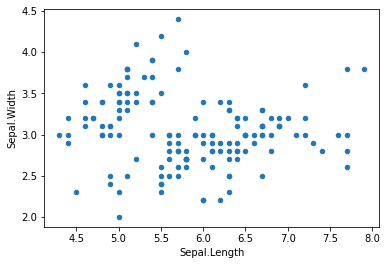

In [5]:
df.plot(kind='scatter',x='Sepal.Length', y='Sepal.Width') # use this to make a scatterplot of the Iris features.

In [12]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


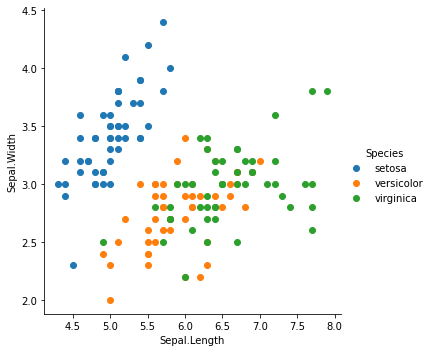

In [8]:
sns.FacetGrid(df, hue='Species', size=5)\
   .map(plt.scatter, 'Sepal.Length', 'Sepal.Width')\
   .add_legend()

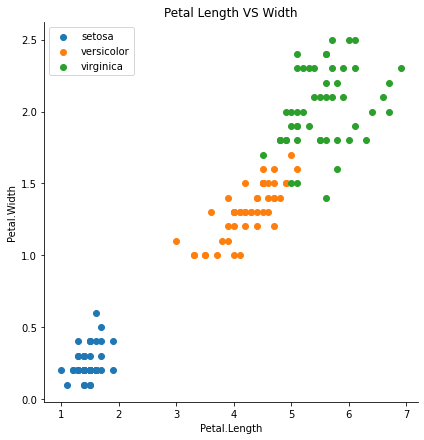

In [21]:
# ploting scatter plot with respect to petal length
petalPlt = sb.FacetGrid(df, hue="Species", size=6).map(plt.scatter, "Petal.Length", "Petal.Width")
plt.legend(loc='upper left');
plt.title("Petal Length VS Width");

Text(0.5, 1.0, 'Sepal Length VS Width')

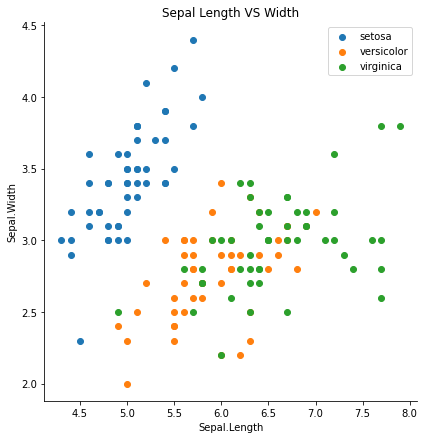

In [24]:
# Plotting scatter plot with respect to sepal length

sepalPlt = sb.FacetGrid(df, hue="Species", size=6).map(plt.scatter, "Sepal.Length", "Sepal.Width")
plt.legend(loc='upper right');
plt.title("Sepal Length VS Width")

In [31]:
# Data setup

import numpy as np
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Number of examples
m = df.shape[0]
# Features
n = 4
# Number of classes
k = 3

X = np.ones((m,n + 1))
y = np.array((m,1))

X[:,1] = df['Petal.Length'].values
X[:,2] = df['Petal.Width'].values
X[:,3] = df['Sepal.Length'].values
X[:,4] = df['Sepal.Width'].values

In [33]:
# Labels

y = df['Species'].values

In [35]:
# Mean normalization

for j in range(n):

    X[:, j] = (X[:, j] - X[:,j].mean())

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

# it shows 80% of data is split for training and 20% of the data goes to testing.

X = df.drop(['Species'], axis=1)
y = df['Species']

# print(X.head())
print(X_train.shape)

# print(y.head())
print(y_test.shape)

(120, 5)
(30,)


In [43]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 93.33333333333333 %


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

